In [119]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [120]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

In [121]:
df.shape

(21613, 21)

In [122]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [123]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [125]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [126]:
df.duplicated().sum()

0

In [127]:
df['floors'] = df['floors'].astype('int64')

In [128]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

In [129]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [130]:
df = df.drop('date', axis=1)

In [131]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,221900.0,3,1.00,1180,5650,1,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,604000.0,4,3.00,1960,5000,1,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  int64  
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

# **Exploratory Data Analysis (EDA)**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


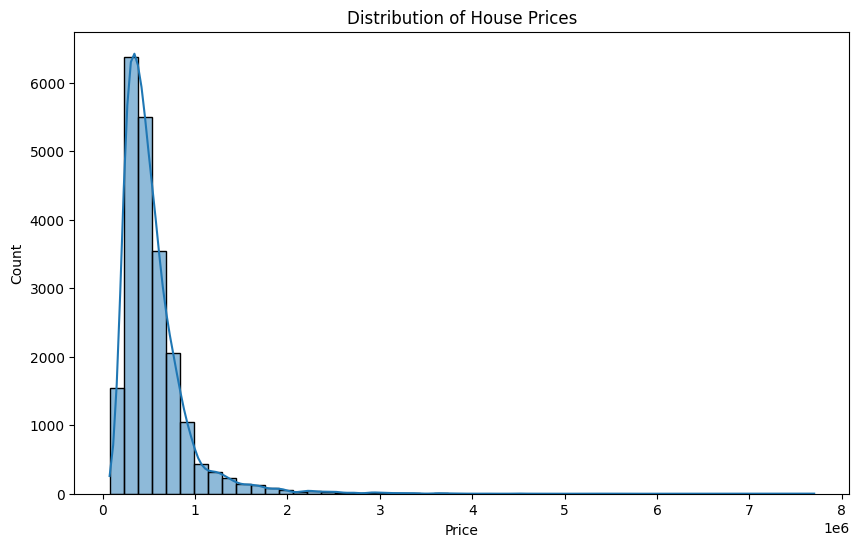

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

In [134]:
print(f"Price Skewness: {df['price'].skew():.2f}")
print(f"Price Kurtosis: {df['price'].kurt():.2f}")

Price Skewness: 4.02
Price Kurtosis: 34.59


Box plot saved as 'price_boxplot.png'


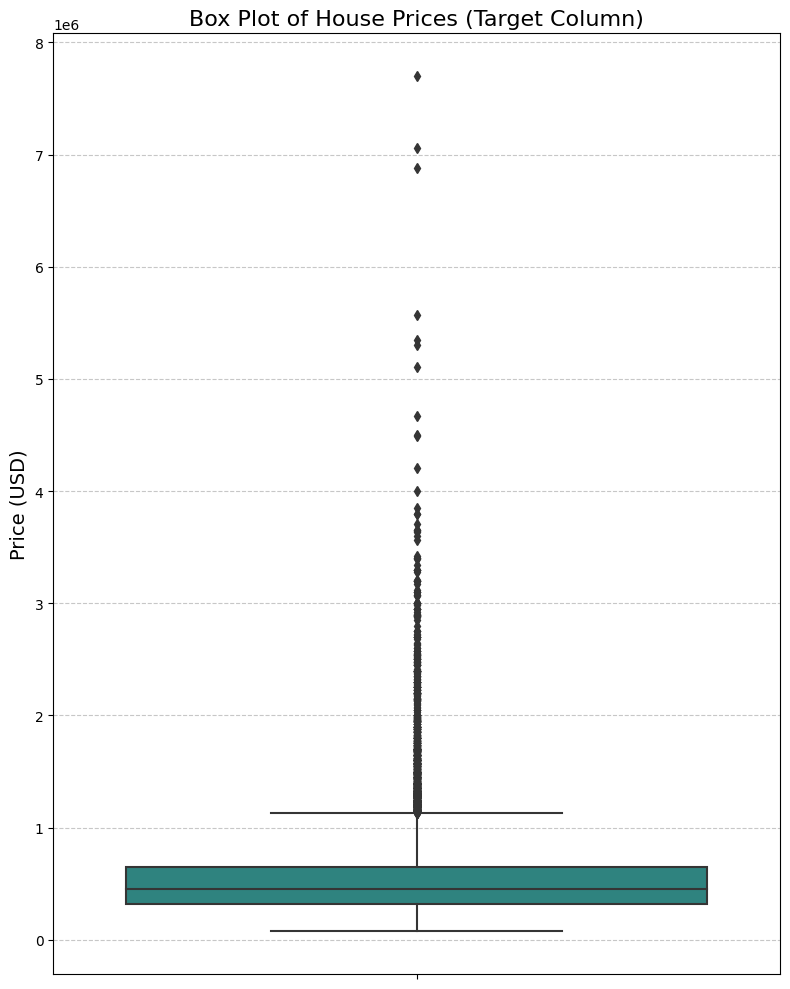

In [135]:
plt.figure(figsize=(8, 10))

sns.boxplot(y=df['price'], palette="viridis")
plt.title('Box Plot of House Prices (Target Column)', fontsize=16)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('price_boxplot.png')
print("Box plot saved as 'price_boxplot.png'")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

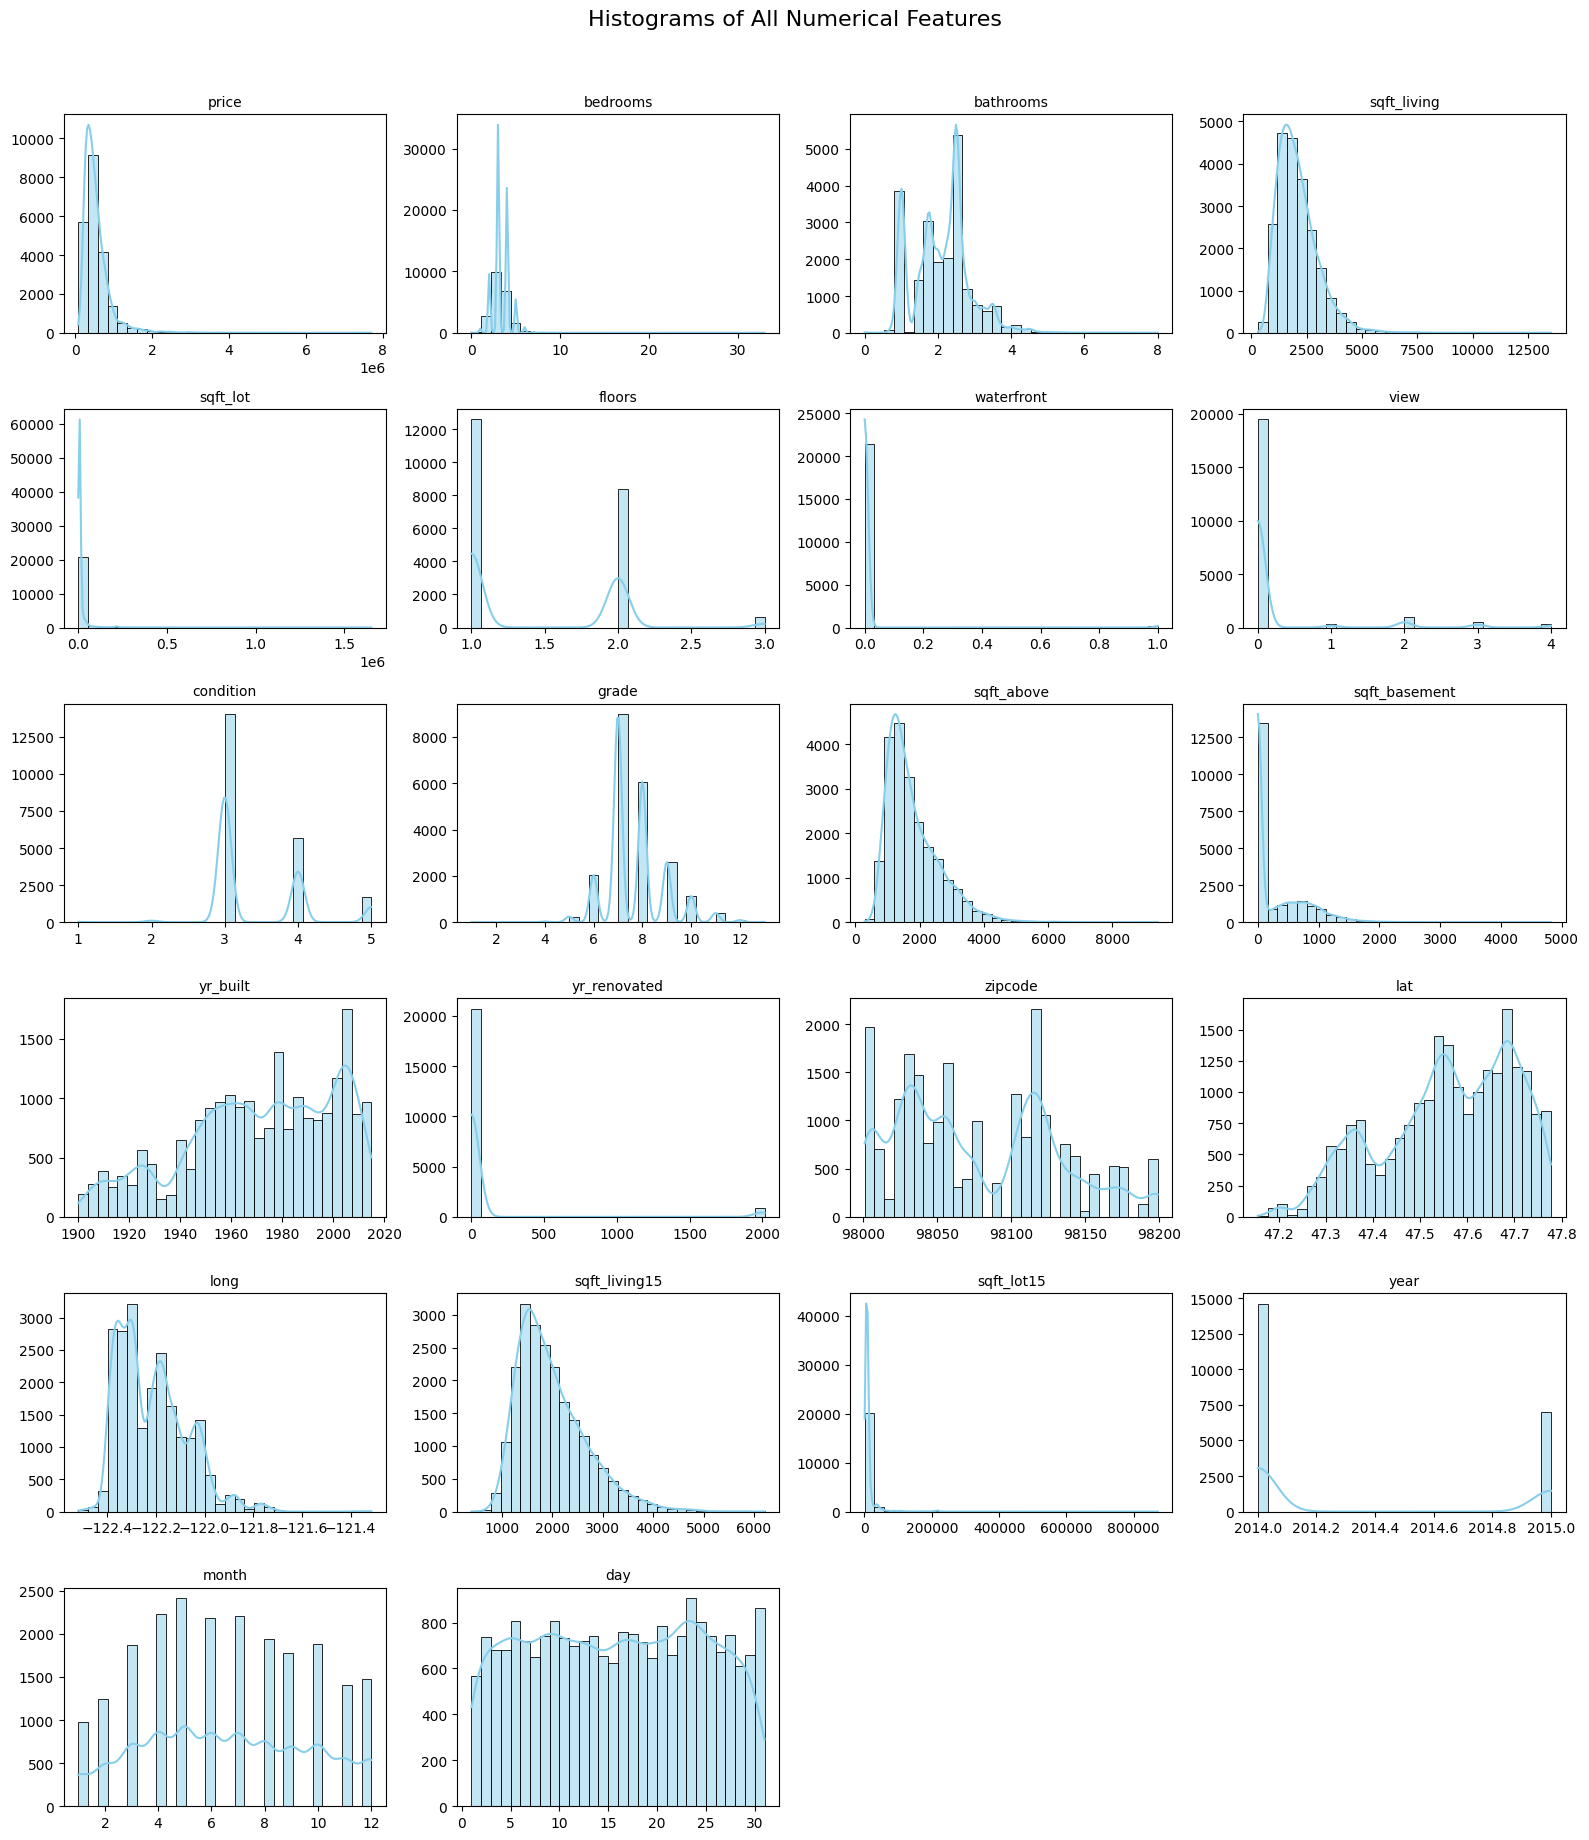

Histograms of all columns saved as 'all_columns_histograms.png'


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# --- 2. DATA PREPARATION (Replicating your steps) ---
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# --- 3. GENERATE HISTOGRAMS IN A LOOP ---
columns_to_plot = df.select_dtypes(include=np.number).columns.tolist()

# Define the grid layout parameters
N_COLS = 4  # Number of columns in the grid
N_ROWS = int(np.ceil(len(columns_to_plot) / N_COLS))

# Create the figure and subplots
fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(4 * N_COLS, 3 * N_ROWS))
axes = axes.flatten()

# Loop through all selected columns
for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(len(columns_to_plot), N_ROWS * N_COLS):
    fig.delaxes(axes[j])

plt.suptitle('Histograms of All Numerical Features', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust layout to prevent overlapping titles/labels
plt.savefig('all_columns_histograms.png')
plt.show()

print("Histograms of all columns saved as 'all_columns_histograms.png'")

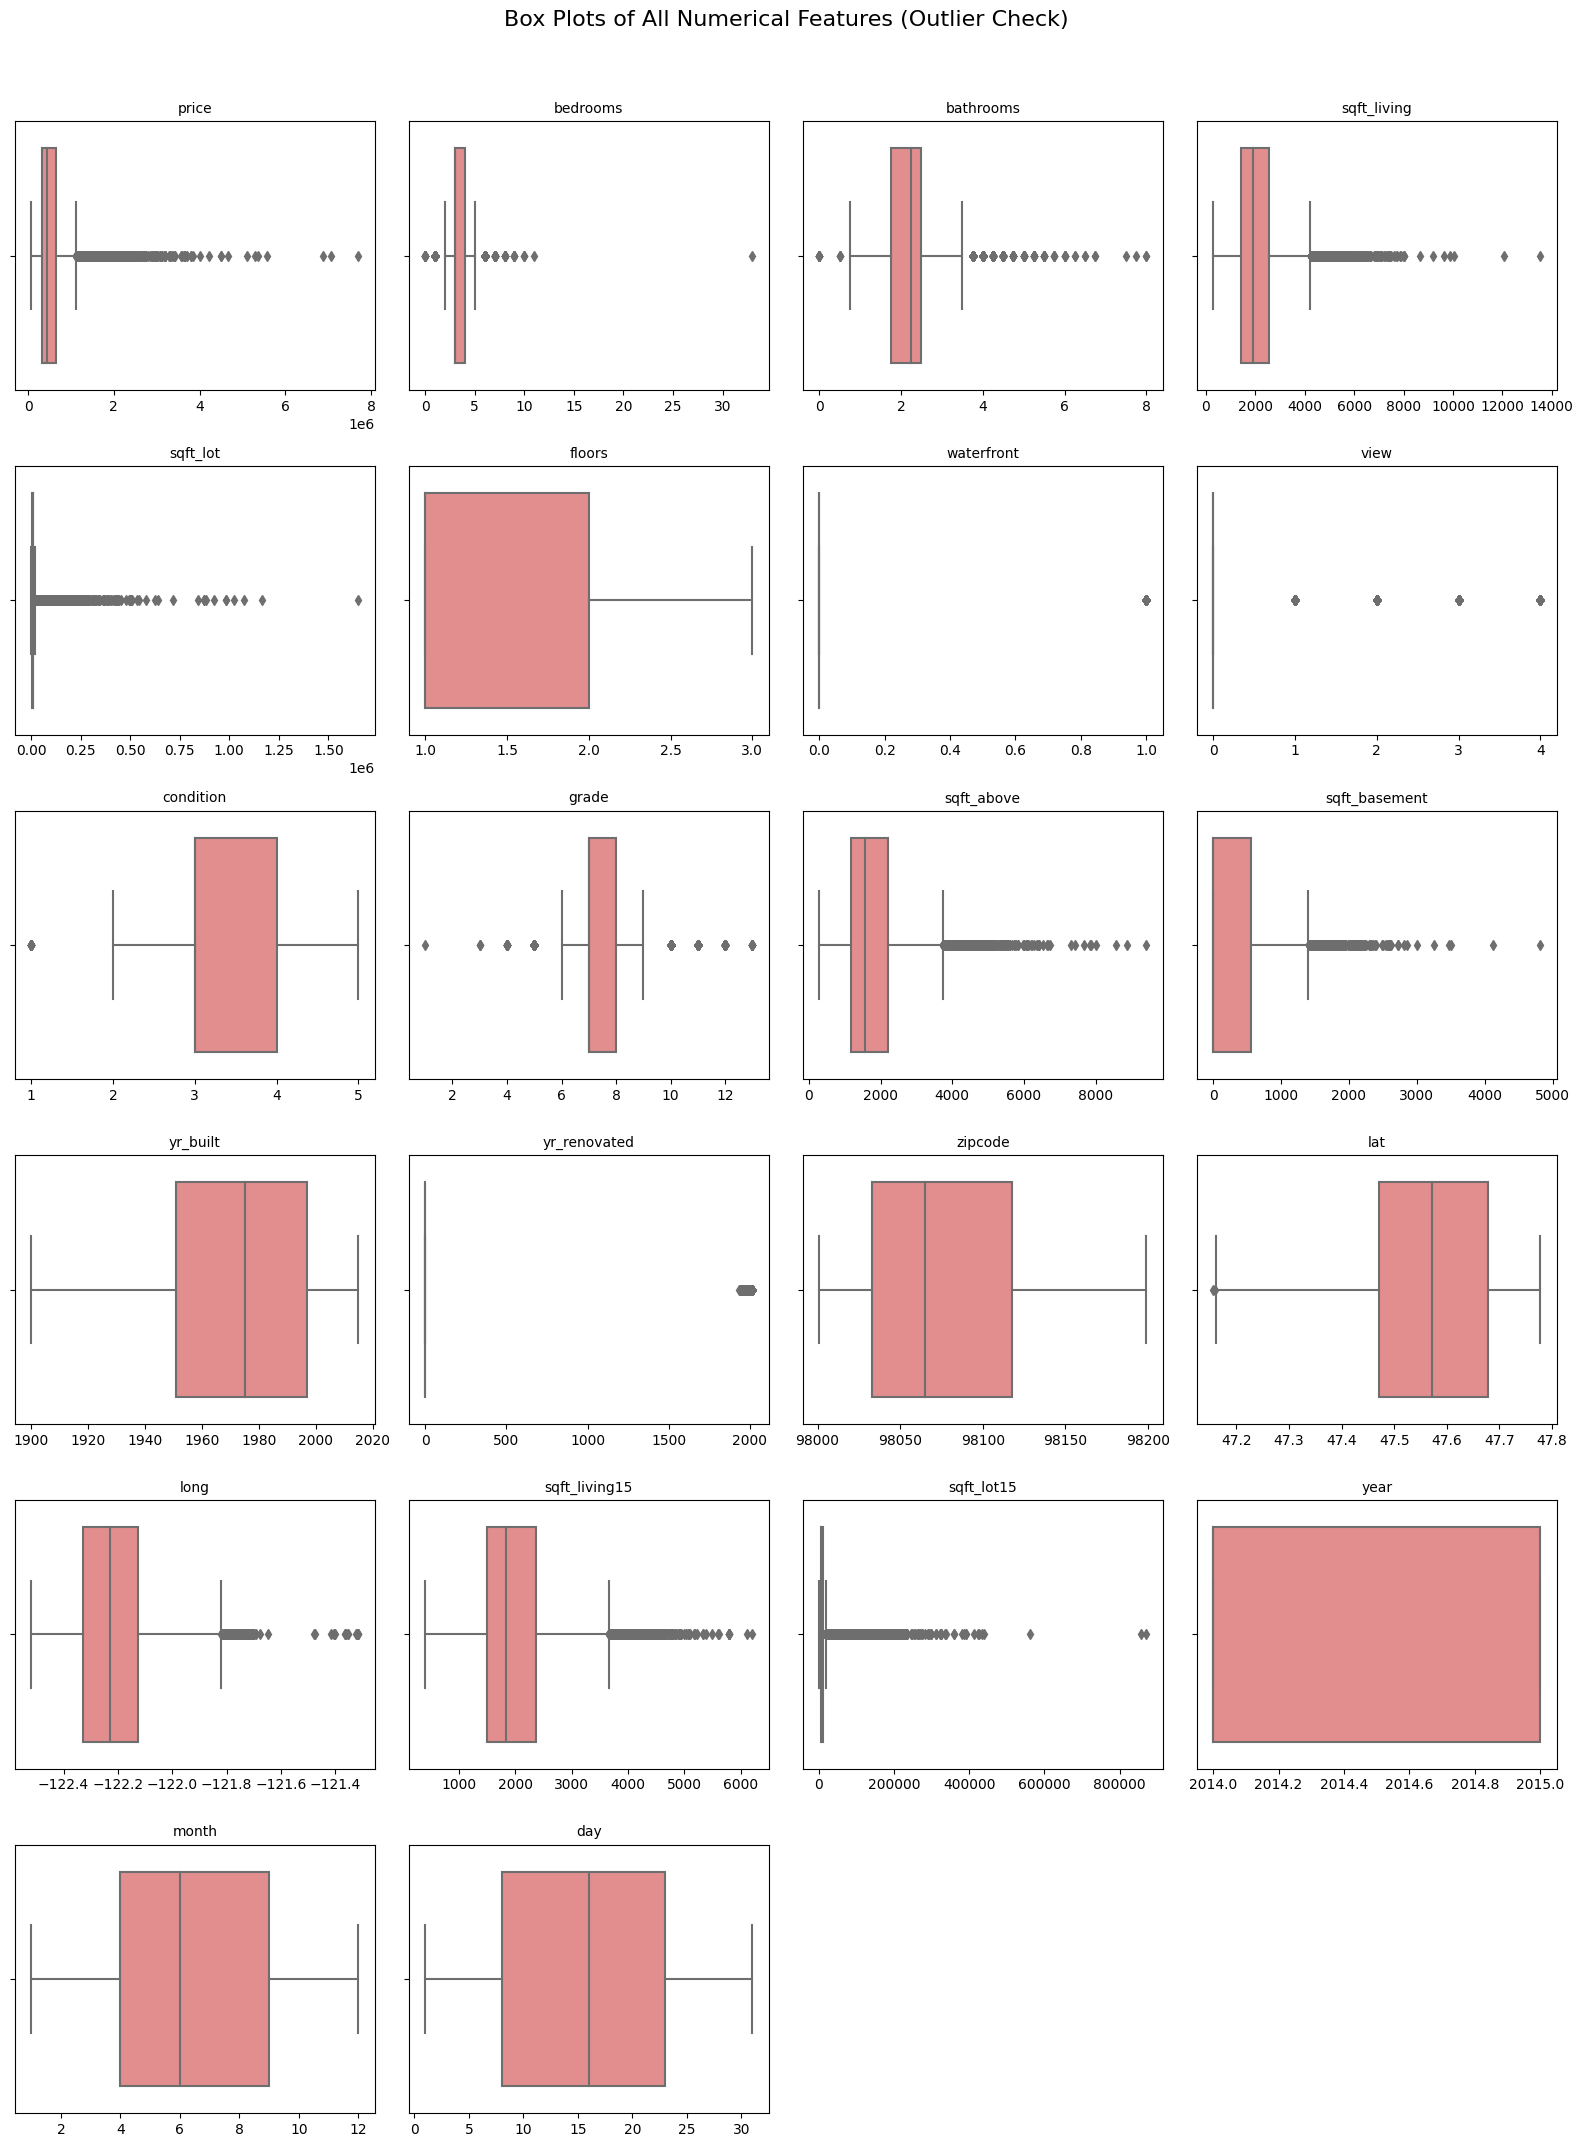

Box plots of all columns saved as 'all_columns_boxplots.png'


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 2. DATA PREPARATION (Replicating your steps) ---
if 'id' in df.columns:
    df = df.drop('id', axis=1, errors='ignore')

# --- 3. GENERATE BOX PLOTS IN A LOOP ---
columns_to_plot = df.select_dtypes(include=np.number).columns.tolist()

# Define the grid layout parameters
N_COLS = 4  # Number of columns in the grid
N_ROWS = int(np.ceil(len(columns_to_plot) / N_COLS))

fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(4 * N_COLS, 3.5 * N_ROWS))
axes = axes.flatten() 

# Loop through all selected columns
for i, col in enumerate(columns_to_plot):
    # Plot a horizontal box plot
    sns.boxplot(x=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(len(columns_to_plot), N_ROWS * N_COLS):
    fig.delaxes(axes[j])

plt.suptitle('Box Plots of All Numerical Features (Outlier Check)', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 1]) 
plt.savefig('all_columns_boxplots.png')
plt.show()

print("Box plots of all columns saved as 'all_columns_boxplots.png'")


📈 Full List of Features Correlating with Price (Sorted):
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.237211
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
day             -0.014670
zipcode         -0.053203
Name: price, dtype: float64


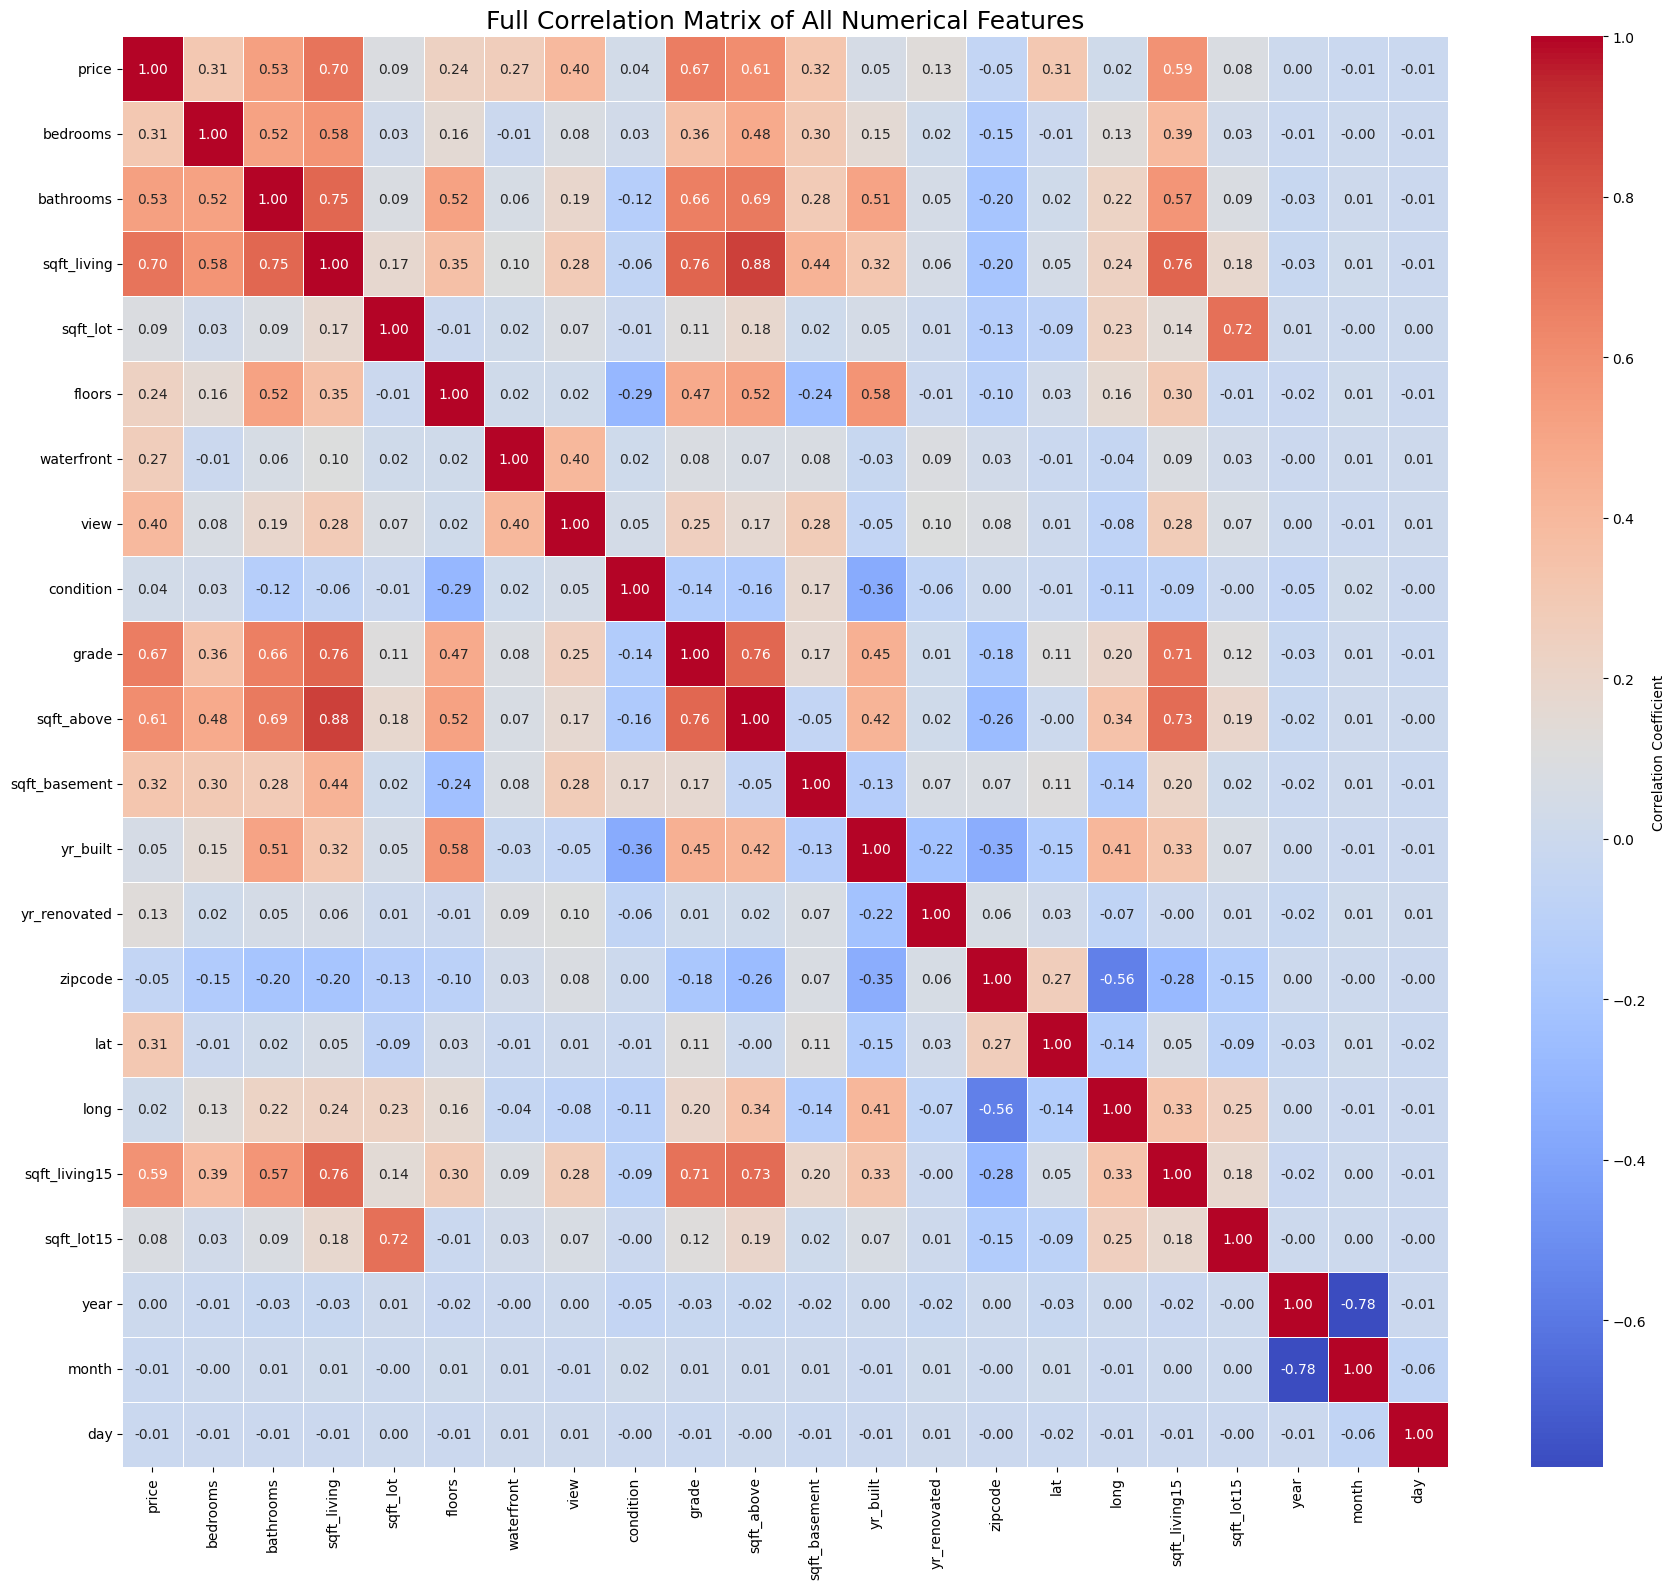

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 2. DATA PREPARATION & FEATURE ENGINEERING ---
if 'id' in df.columns:
    df = df.drop('id', axis=1, errors='ignore')

# --- 3. CALCULATE FULL CORRELATION MATRIX ---
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

# --- 4. PRINT TOP CORRELATIONS WITH PRICE ---
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

print("\n📈 Full List of Features Correlating with Price (Sorted):")
print(price_correlations)

# --- 5. VISUALIZE FULL HEATMAP ---
plt.figure(figsize=(18, 16)) 
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Full Correlation Matrix of All Numerical Features', fontsize=18)
plt.tight_layout()
plt.savefig('full_correlation_heatmap.png')
plt.show()

In [139]:
# List of columns to drop
columns_to_drop = [             
    'year',           
    'month',
    'day',
    'zipcode'
]

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1)

print(f"Dropped {len(columns_to_drop)} columns: {columns_to_drop}")

df.head()

Dropped 4 columns: ['year', 'month', 'day', 'zipcode']


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [140]:
from datetime import datetime

current_year = datetime.now().year

df["house_age"] = current_year - df["yr_built"]

df["renovated_age"] = np.where(df["yr_renovated"] == 0, 0, current_year - df["yr_renovated"])

In [141]:
# List of columns to drop
columns_to_drop = [             
    'yr_built',           
    'yr_renovated'
]

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1)

print(f"Dropped {len(columns_to_drop)} columns: {columns_to_drop}")

df.head()

Dropped 2 columns: ['yr_built', 'yr_renovated']


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,house_age,renovated_age
0,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,70,0
1,538000.0,3,2.25,2570,7242,2,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,74,34
2,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,47.7379,-122.233,2720,8062,92,0
3,604000.0,4,3.00,1960,5000,1,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,60,0
4,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,38,0


# **Train Test Split**

In [142]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# --- 1. Define Features (X) and Target (y) ---
TARGET_COLUMN = 'price' 

# X contains all columns EXCEPT the target
X = df.drop(columns=[TARGET_COLUMN], errors='ignore') 
# y is the target column
y = df[TARGET_COLUMN] 

# --- 2. Perform the Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42 
)

# --- 3. Verify the Split ---
print("✅ Data Split Successful!")
print(f"Total samples: {len(X)}")
print(f"Features (X) - Number of columns: {X.shape[1]}")
print("---")
print(f"X_train shape: {X_train.shape} (80% of data)")
print(f"X_test shape: {X_test.shape} (20% of data)")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data Split Successful!
Total samples: 21613
Features (X) - Number of columns: 17
---
X_train shape: (17290, 17) (80% of data)
X_test shape: (4323, 17) (20% of data)
y_train shape: (17290,)
y_test shape: (4323,)


In [143]:
from sklearn.preprocessing import PowerTransformer, RobustScaler
import numpy as np
import pandas as pd

# --- 1. TARGET TRANSFORMATION (Y_train and Y_test) ---
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print("✅ Target Variable (price) is now Log-Transformed to y_train_log and y_test_log.")

✅ Target Variable (price) is now Log-Transformed to y_train_log and y_test_log.


In [144]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, PowerTransformer

# --- 2. CAPPING (WINSORIZATION) ---
for col in cols_to_transform:
    # Calculate the 1st and 99th percentile bounds using ONLY X_train
    lower_bound = X_train[col].quantile(0.01)
    upper_bound = X_train[col].quantile(0.99)
    
    # Cap values in X_train
    X_train[col] = np.where(X_train[col] < lower_bound, lower_bound, X_train[col])
    X_train[col] = np.where(X_train[col] > upper_bound, upper_bound, X_train[col])
    
    # Cap X_test using the SAME bounds calculated from X_train
    X_test[col] = np.where(X_test[col] < lower_bound, lower_bound, X_test[col])
    X_test[col] = np.where(X_test[col] > upper_bound, upper_bound, X_test[col])

print("✅ Outliers successfully capped at the 1st and 99th percentiles.")

✅ Outliers successfully capped at the 1st and 99th percentiles.


In [145]:
# --- 2. FEATURE TRANSFORMATION (X_train and X_test) ---

continuous_cols = [
    'sqft_above', 'sqft_living15', 'sqft_basement', 'sqft_living', 'sqft_lot','sqft_lot15','renovated_age','house_age']

cols_to_transform = [col for col in continuous_cols if col in X_train.columns]

# --- 3. YEO-JOHNSON TRANSFORMATION ---
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit on train
X_train[cols_to_transform] = pt.fit_transform(X_train[cols_to_transform])

# Transform test
X_test[cols_to_transform] = pt.transform(X_test[cols_to_transform])

print("✅ Yeo-Johnson Transformation successfully applied to filtered features.")


✅ Yeo-Johnson Transformation successfully applied to filtered features.


In [146]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train_log.shape)
print("y_test shape:", y_test_log.shape)


X_train shape: (17290, 17)
X_test shape: (4323, 17)
y_train shape: (17290,)
y_test shape: (4323,)


In [147]:
print(X_train.columns.tolist())
print(len(X_train.columns))

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age', 'renovated_age']
17


In [148]:
# B. ROBUST SCALING
robust_scaler = RobustScaler()

# 1. FIT on X_train only and TRANSFORM X_train
X_train.loc[:, cols_to_transform] = robust_scaler.fit_transform(X_train[cols_to_transform])

# 2. TRANSFORM X_test (DO NOT FIT)
X_test.loc[:, cols_to_transform] = robust_scaler.transform(X_test[cols_to_transform])

print("✅ Robust Scaling applied to features.")

✅ Robust Scaling applied to features.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

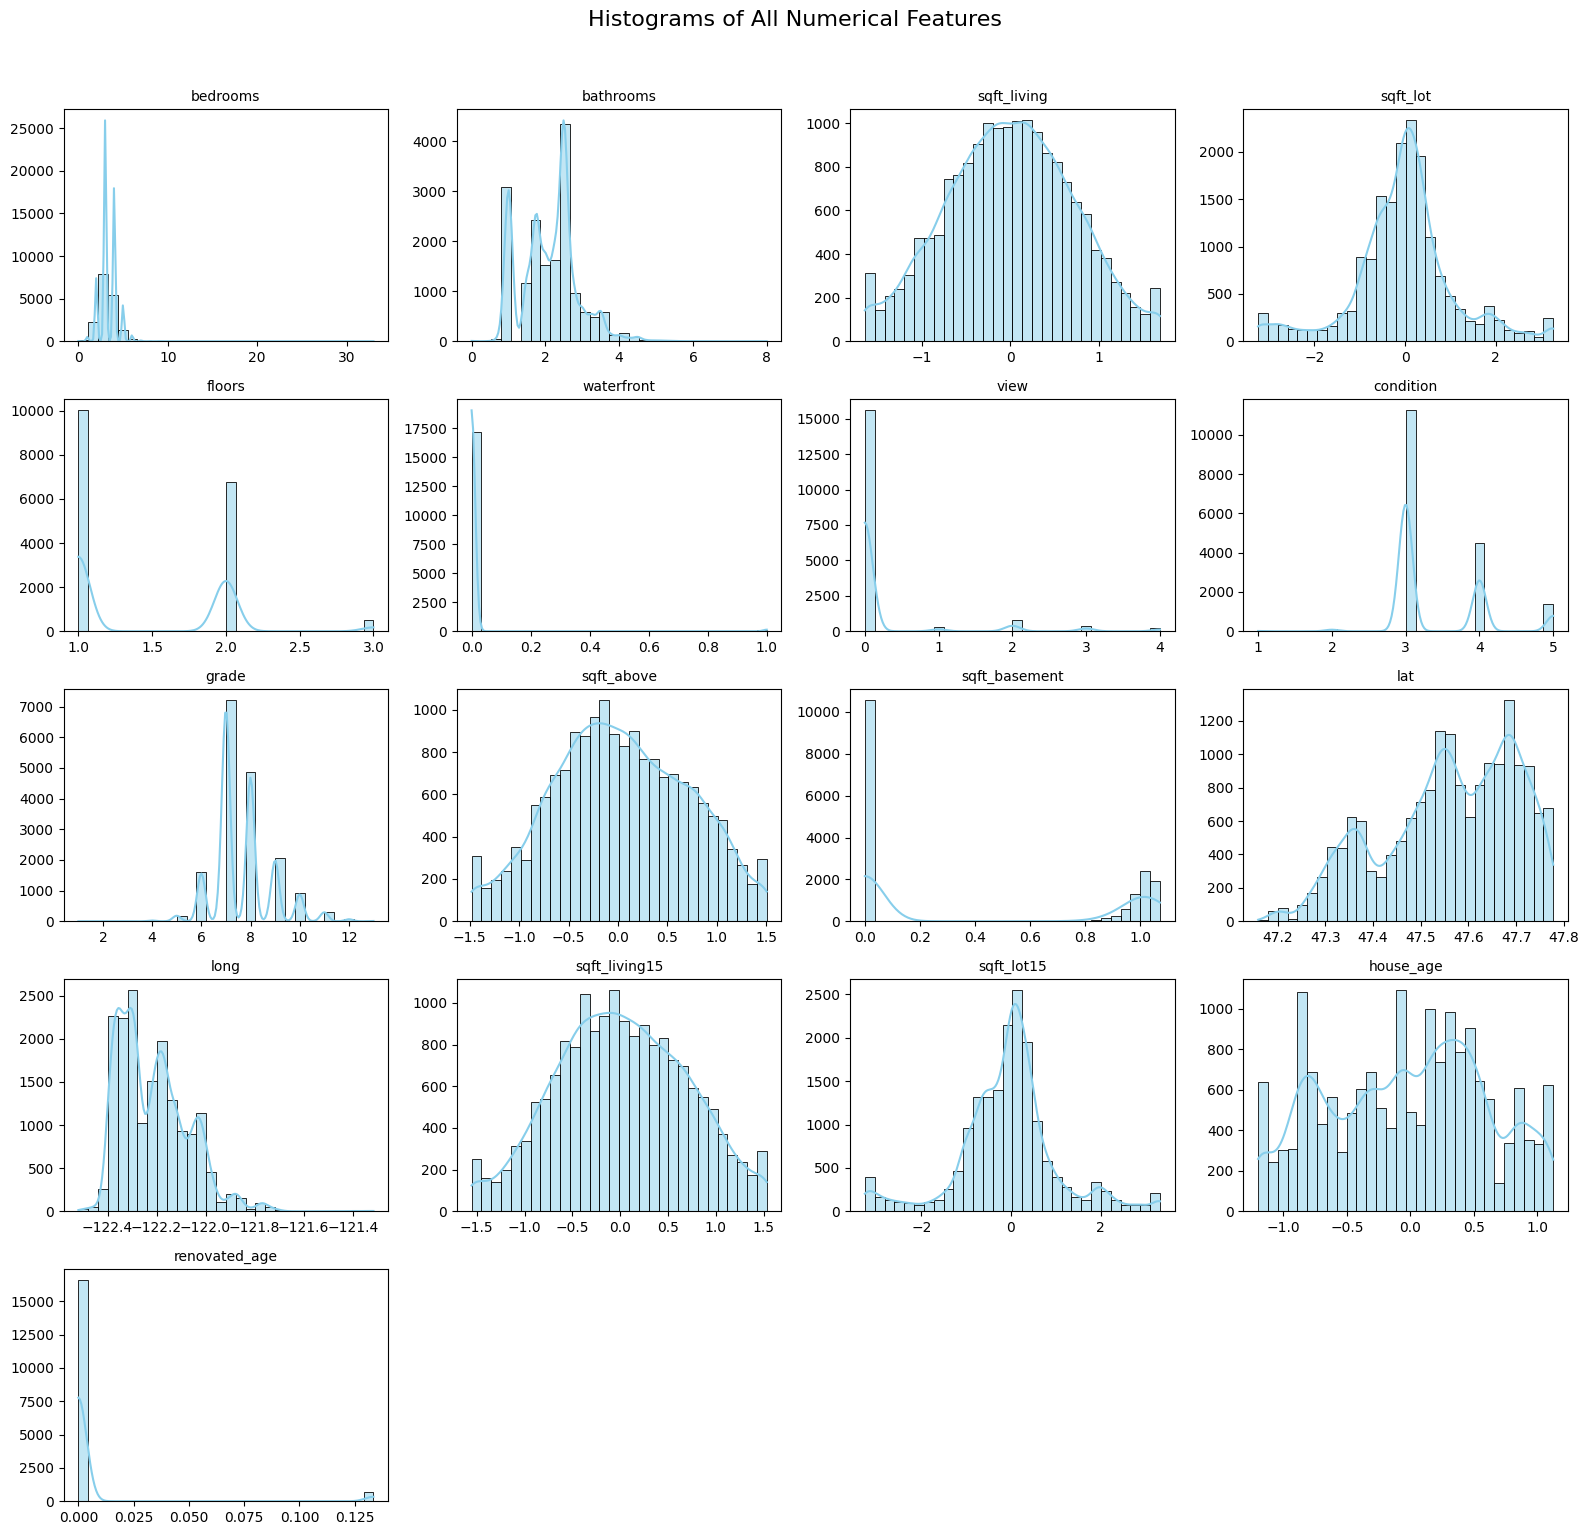

Histograms of all columns saved as 'all_columns_histograms.png'


In [149]:
# --- 3. GENERATE HISTOGRAMS IN A LOOP ---
columns_to_plot = X_train.select_dtypes(include=np.number).columns.tolist()

# Define the grid layout parameters
N_COLS = 4  # Number of columns in the grid
N_ROWS = int(np.ceil(len(columns_to_plot) / N_COLS))

# Create the figure and subplots
fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(4 * N_COLS, 3 * N_ROWS))
axes = axes.flatten() 

for i, col in enumerate(columns_to_plot):
    # Plot histogram with KDE (Kernel Density Estimate) for smooth distribution shape
    sns.histplot(X_train[col], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(len(columns_to_plot), N_ROWS * N_COLS):
    fig.delaxes(axes[j])

plt.suptitle('Histograms of All Numerical Features', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust layout to prevent overlapping titles/labels
plt.savefig('all_columns_histograms.png')
plt.show()

print("Histograms of all columns saved as 'all_columns_histograms.png'")

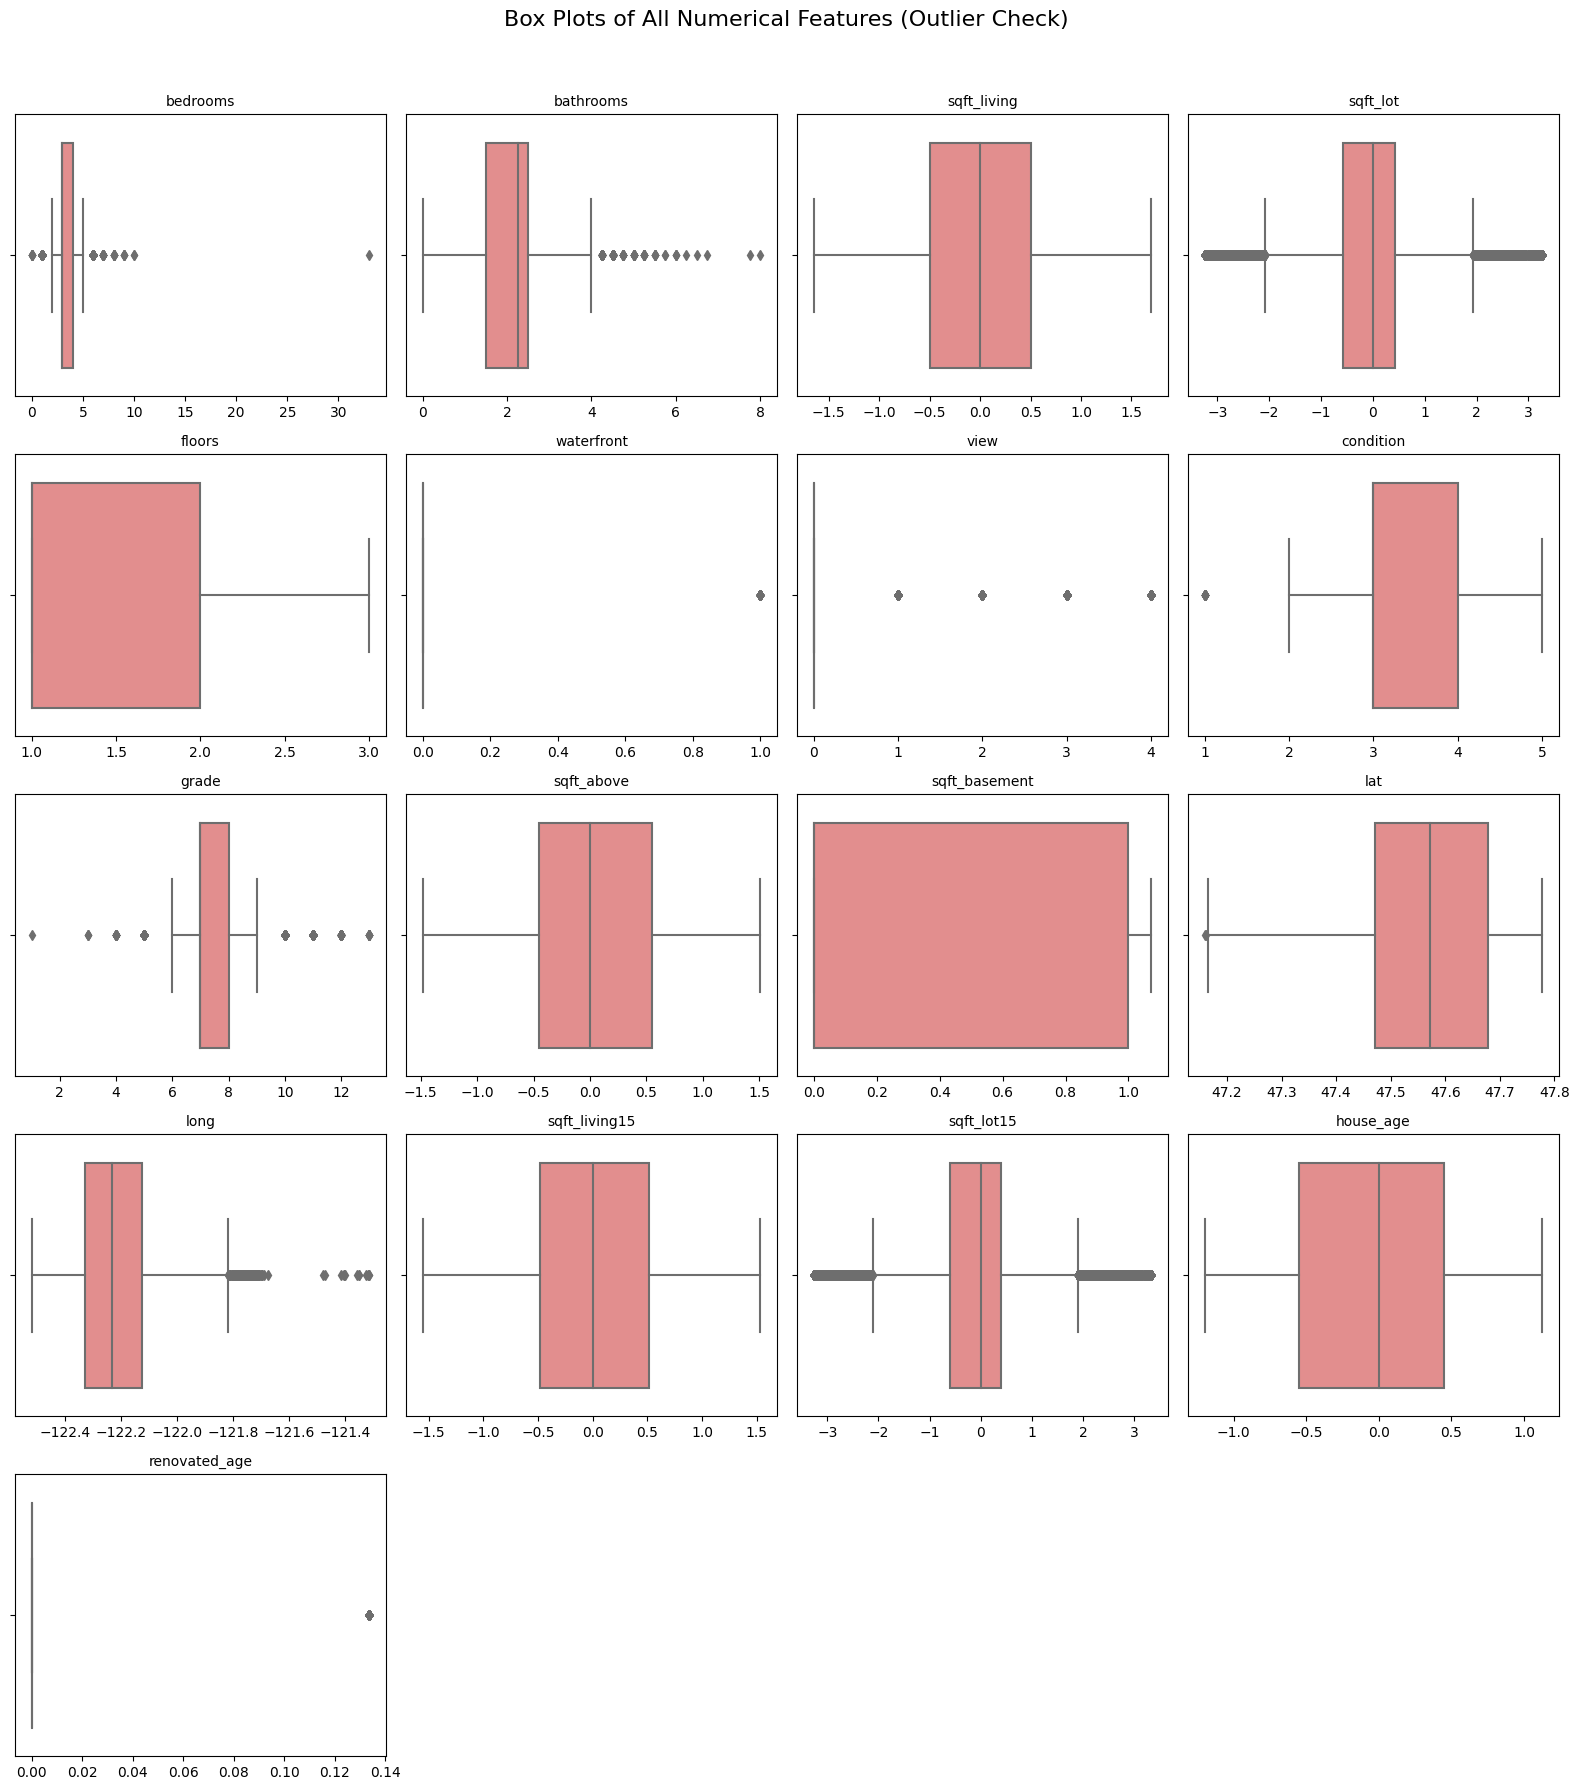

Box plots of all columns saved as 'all_columns_boxplots.png'


In [150]:
# --- 3. GENERATE BOX PLOTS IN A LOOP ---
columns_to_plot = X_train.select_dtypes(include=np.number).columns.tolist()

N_COLS = 4  # Number of columns in the grid
N_ROWS = int(np.ceil(len(columns_to_plot) / N_COLS))

fig, axes = plt.subplots(N_ROWS, N_COLS, figsize=(4 * N_COLS, 3.5 * N_ROWS))
axes = axes.flatten() 

# Loop through all selected columns
for i, col in enumerate(columns_to_plot):
    # Plot a horizontal box plot
    sns.boxplot(x=X_train[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(len(columns_to_plot), N_ROWS * N_COLS):
    fig.delaxes(axes[j])

plt.suptitle('Box Plots of All Numerical Features (Outlier Check)', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust layout to prevent overlapping titles/labels
plt.savefig('all_columns_boxplots.png')
plt.show()

print("Box plots of all columns saved as 'all_columns_boxplots.png'")

Box plot saved as 'price_boxplot.png'


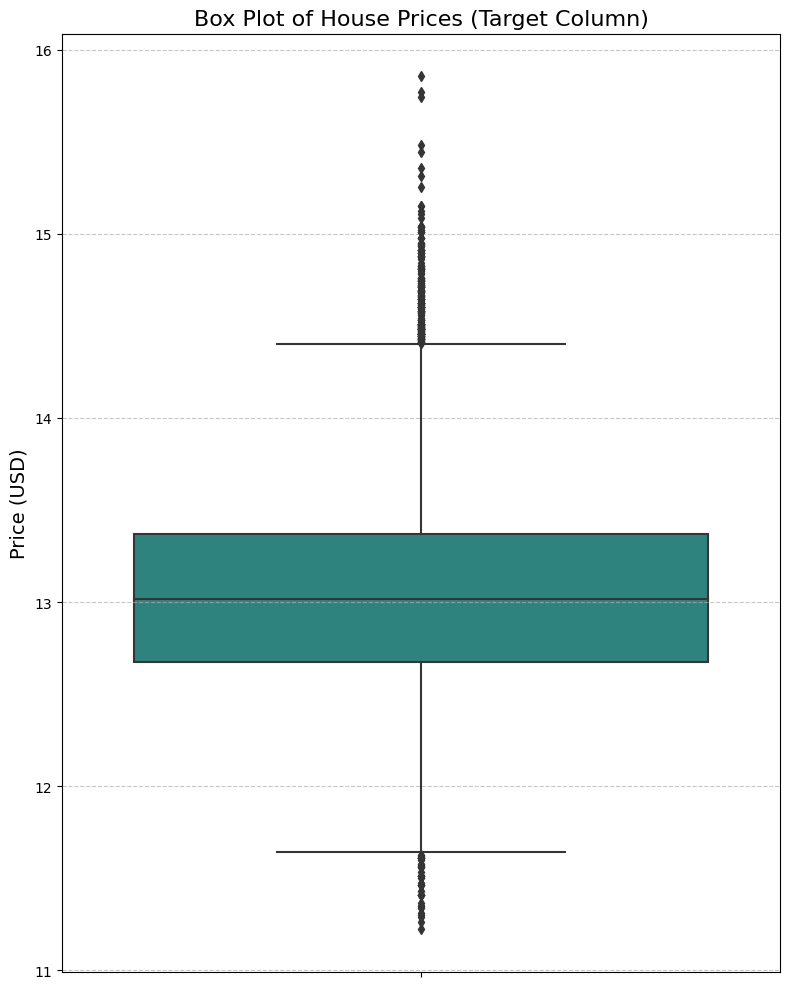

In [151]:
plt.figure(figsize=(8, 10))

sns.boxplot(y=y_train_log, palette="viridis")
plt.title('Box Plot of House Prices (Target Column)', fontsize=16)
plt.ylabel('Price (USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('price_boxplot.png')
print("Box plot saved as 'price_boxplot.png'")

# **Model**

In [152]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

In [153]:
def evaluate_model(model, X_train, y_train_log, X_test, y_test_log):
    model.fit(X_train, y_train_log)

    # Predictions in LOG scale
    y_pred_log = model.predict(X_test)

    # Convert back to ORIGINAL PRICE scale
    y_pred = np.expm1(y_pred_log)
    y_test = np.expm1(y_test_log)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}")

    return r2, mae, rmse

In [154]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

print("📌 XGBoost Results:")
evaluate_model(xgb, X_train, y_train_log, X_test, y_test_log)

📌 XGBoost Results:
R² Score: 0.9062
MAE: 64,918.10
RMSE: 119,080.32


(0.9062016695170496, 64918.10300825526, 119080.32254572763)

In [155]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

print("📌 LightGBM Results:")
evaluate_model(lgb, X_train, y_train_log, X_test, y_test_log)

📌 LightGBM Results:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2157
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 17
[LightGBM] [Info] Start training from score 13.045168
R² Score: 0.9057
MAE: 64,995.26
RMSE: 119,403.17


(0.9056923702396988, 64995.26222034174, 119403.17168274561)

In [156]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    n_jobs=-1
)

print("📌 Random Forest Results:")
evaluate_model(rf, X_train, y_train_log, X_test, y_test_log)

📌 Random Forest Results:
R² Score: 0.8635
MAE: 73,556.14
RMSE: 143,659.23


(0.8634844413463647, 73556.13953546948, 143659.226397627)

In [157]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(
    iterations=800,
    depth=7,
    learning_rate=0.05,
    loss_function='RMSE',
    random_state=42,
    verbose=0
)

print("📌 CatBoost Results:")
evaluate_model(cat, X_train, y_train_log, X_test, y_test_log)

📌 CatBoost Results:
R² Score: 0.9139
MAE: 63,812.24
RMSE: 114,099.39


(0.9138844224416656, 63812.24253863765, 114099.38601661864)

In [158]:
import matplotlib.pyplot as plt
import numpy as np

def plot_actual_vs_predicted(model, X_train, y_train_log, X_test, y_test_log, title="Actual vs Predicted"):
    # Train model
    model.fit(X_train, y_train_log)

    # Predict (log scale)
    y_pred_log = model.predict(X_test)

    # Convert back to original price scale
    y_pred = np.expm1(y_pred_log)
    y_test = np.expm1(y_test_log)

    # Scatter Plot
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='k')

    # Perfect diagonal line
    max_val = max(max(y_test), max(y_pred))
    plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2)

    # Labels and title
    plt.title(title, fontsize=16)
    plt.xlabel("Actual Price", fontsize=14)
    plt.ylabel("Predicted Price", fontsize=14)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

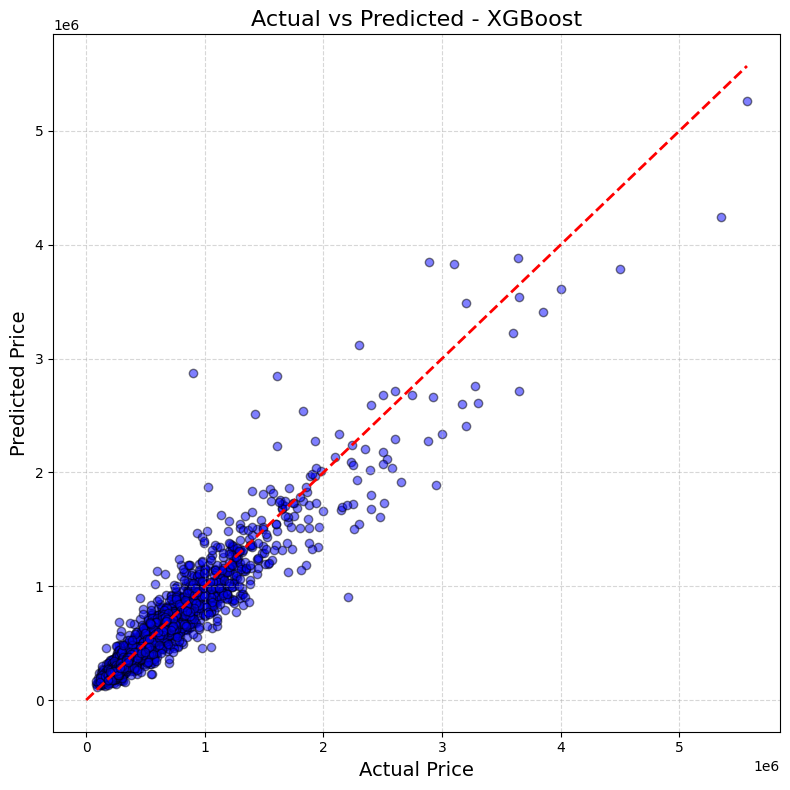

In [159]:
plot_actual_vs_predicted(
    xgb, 
    X_train, y_train_log, 
    X_test, y_test_log, 
    title="Actual vs Predicted - XGBoost"
)

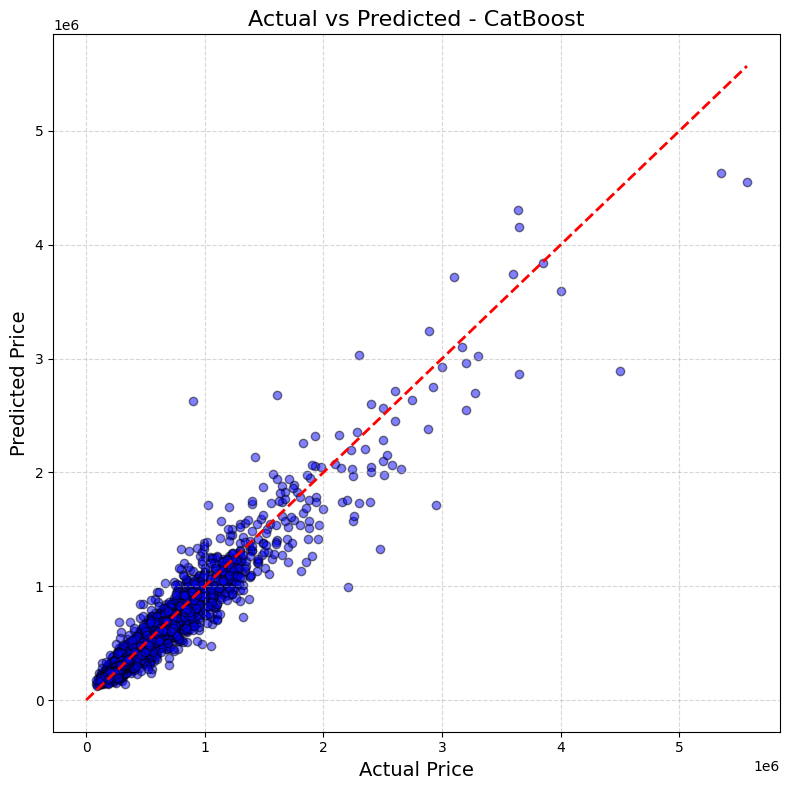

In [160]:
plot_actual_vs_predicted(
    cat,
    X_train, y_train_log,
    X_test, y_test_log,
    title="Actual vs Predicted - CatBoost"
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2157
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 17
[LightGBM] [Info] Start training from score 13.045168


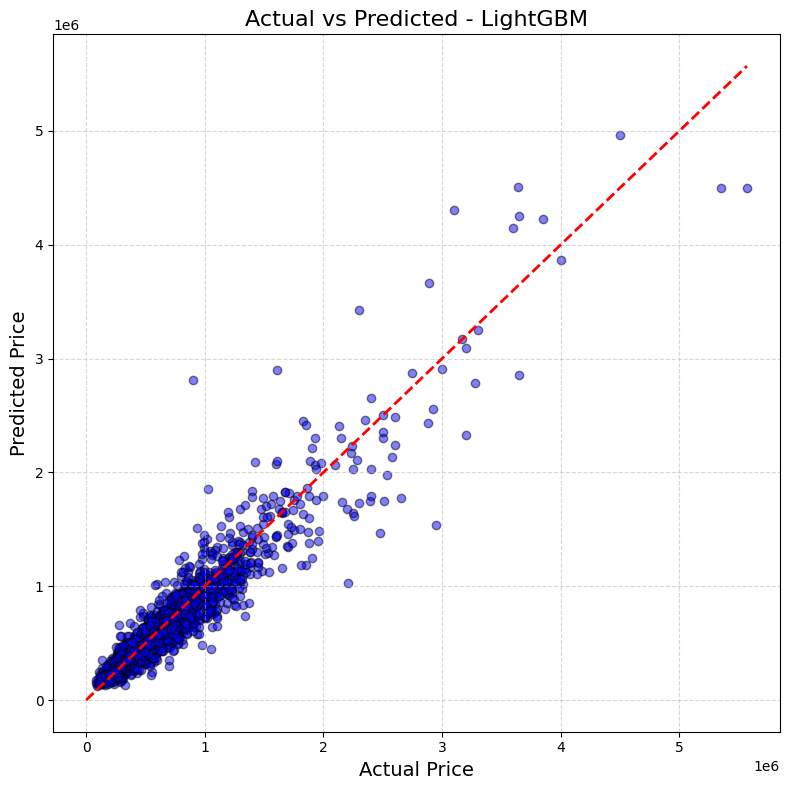

In [161]:
plot_actual_vs_predicted(
    lgb,
    X_train, y_train_log,
    X_test, y_test_log,
    title="Actual vs Predicted - LightGBM"
)

In [162]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

models = {
    "XGBoost": XGBRegressor(
        n_estimators=600, learning_rate=0.05,
        max_depth=7, subsample=0.8, colsample_bytree=0.8,
        random_state=42
    ),

    "LightGBM": LGBMRegressor(
        n_estimators=600, learning_rate=0.05,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42
    ),

    "CatBoost": CatBoostRegressor(
        iterations=800, depth=7, learning_rate=0.05,
        loss_function='RMSE', random_state=42, verbose=0
    )
}


In [163]:
import pandas as pd

results = []

for model_name, model in models.items():
    r2, mae, rmse = evaluate_model(model, X_train, y_train_log, X_test, y_test_log)

    results.append({
        "Model": model_name,
        "R² Score": round(r2, 4),
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2)
    })

results_df = pd.DataFrame(results)

# Sort by RMSE (lowest is best)
results_df = results_df.sort_values(by="RMSE", ascending=True)

print("\n📊 Model Comparison Table:")
print(results_df)


R² Score: 0.9062
MAE: 64,918.10
RMSE: 119,080.32
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2157
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 17
[LightGBM] [Info] Start training from score 13.045168
R² Score: 0.9057
MAE: 64,995.26
RMSE: 119,403.17
R² Score: 0.9139
MAE: 63,812.24
RMSE: 114,099.39

📊 Model Comparison Table:
      Model  R² Score       MAE       RMSE
2  CatBoost    0.9139  63812.24  114099.39
0   XGBoost    0.9062  64918.10  119080.32
1  LightGBM    0.9057  64995.26  119403.17


In [164]:
residuals = y_test - y_pred

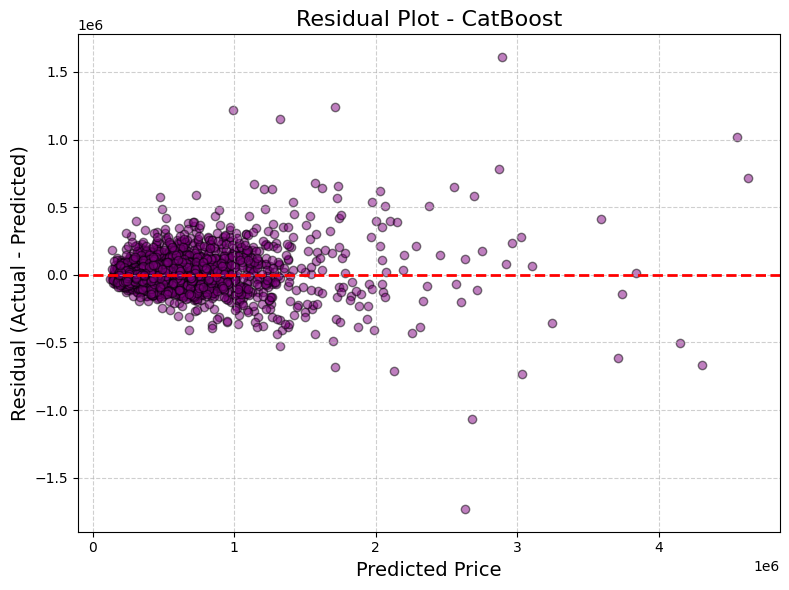

In [165]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple', edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.title("Residual Plot - CatBoost", fontsize=16)
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual (Actual - Predicted)", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


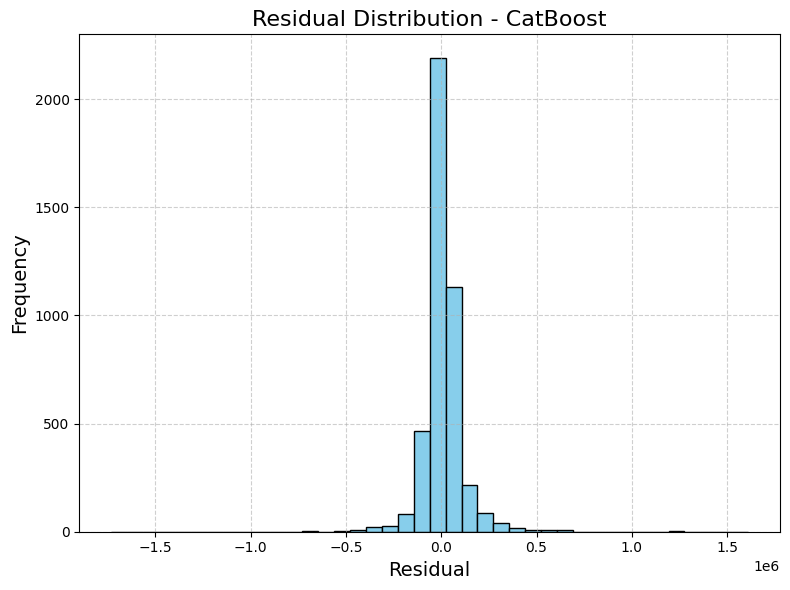

In [166]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=40, color='skyblue', edgecolor='black')
plt.title("Residual Distribution - CatBoost", fontsize=16)
plt.xlabel("Residual", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
cat = CatBoostRegressor(
    loss_function='RMSE',
    random_state=42,
    verbose=0
)

param_grid = {
    'iterations': [400, 800, 1200],
    'depth': [6, 7, 8, 10],
    'learning_rate': [0.03, 0.05, 0.08],
    'l2_leaf_reg': [1, 3, 5],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=cat,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train, y_train_log)


best_cat = CatBoostRegressor(
    **grid.best_params__,
    loss_function='RMSE',
    random_state=42,
    verbose=0
)

best_cat.fit(X_train, y_train_log)


y_pred_log = best_cat.predict(X_test)
y_pred = np.expm1(y_pred_log)

print("\n📊 Tuned CatBoost Performance:")
print("R²:", r2_score(np.expm1(y_test_log), y_pred))
print("MAE:", mean_absolute_error(np.expm1(y_test_log), y_pred))
print("RMSE:", np.sqrt(mean_squared_error(np.expm1(y_test_log), y_pred)))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
